<a href="https://colab.research.google.com/github/sanki1m/Housing-price-prediction/blob/main/Housing_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

 Loading the California housing dataset into a DataFrame and separating features (X) from the target variable (Price).

In [ ]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target
X = df.drop('Price', axis=1)
y = df['Price']

Splitting the dataset into training (80%) and testing (20%) sets so we can train the model on one set and test on another.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling features to make them equally important, as KNN is sensitive to the scale of data.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Testing different numbers of neighbors (K values from 1 to 30) to see which gives us the lowest error.




In [ ]:
rmse_list = []
K_values = range(1, 30)

In [ ]:
for k in K_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    rmse_list.append(rmse)


Creating a graph showing RMSE (error) for each K. We choose the K where the error curve forms an "elbow" or sharply changes direction.

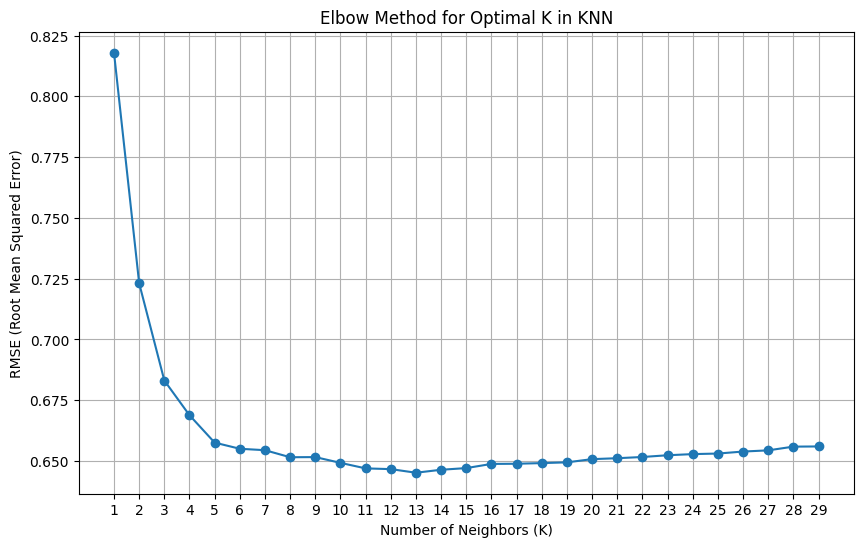

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K_values, rmse_list, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('RMSE (Root Mean Squared Error)')
plt.title('Elbow Method for Optimal K in KNN')
plt.xticks(K_values)
plt.grid()
plt.show()

Automatically picking the optimal K value (with lowest error) from the results and retraining the KNN model using this best K.

In [ ]:
optimal_k = rmse_list.index(min(rmse_list)) + 1
print(f"Optimal number of neighbors (K): {optimal_k}")

knn_final = KNeighborsRegressor(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)


Optimal number of neighbors (K): 13


Evaluating the final model’s accuracy by calculating the final RMSE (error). This shows how well our model predicts house prices.

In [ ]:
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))
print(f"Final RMSE using K={optimal_k}: {final_rmse}")


Final RMSE using K=13: 0.6452046222487675
